## Imports

In [1]:
# Numbers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Graphs
import seaborn as sns

# ML
import sklearn
import sklearn.model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


# Pipeline
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline

# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization



In [34]:
# ML
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.metrics import balanced_accuracy_score

## Loading Data
[Source](https://www.kaggle.com/discussions/general/74235)

Upload your kaggle.json file for authentication to download the file

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
! kaggle competitions download -c ds3-datathon-heart-disease
! unzip "ds3-datathon-heart-disease.zip" -d heart
! rm "ds3-datathon-heart-disease.zip"

  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 29.0MB/s]
Archive:  ds3-datathon-heart-disease.zip
  inflating: heart/heart_sample_submission.csv  
  inflating: heart/heart_test.csv    
  inflating: heart/heart_train.csv   


In [5]:
data_train = pd.read_csv("/content/heart/heart_train.csv")
data_train_oh = pd.get_dummies(data_train, drop_first=True).iloc[:,2:]

<Axes: >

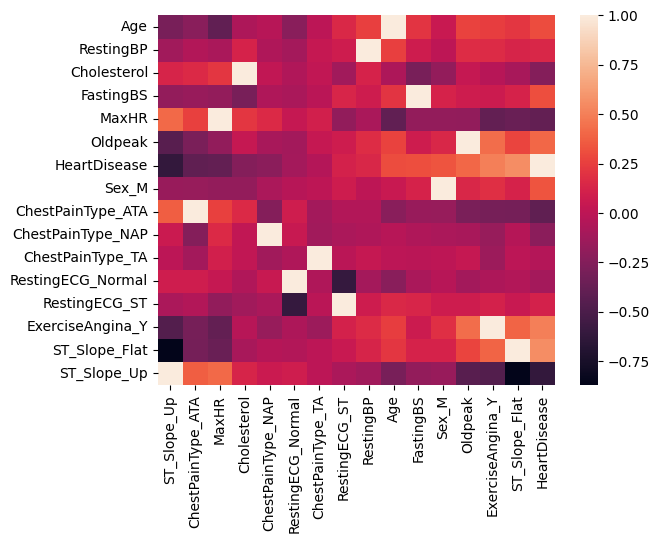

In [ ]:
train_cor = data_train_oh.corr().sort_values("HeartDisease",axis = 1)
sns.heatmap(train_cor)

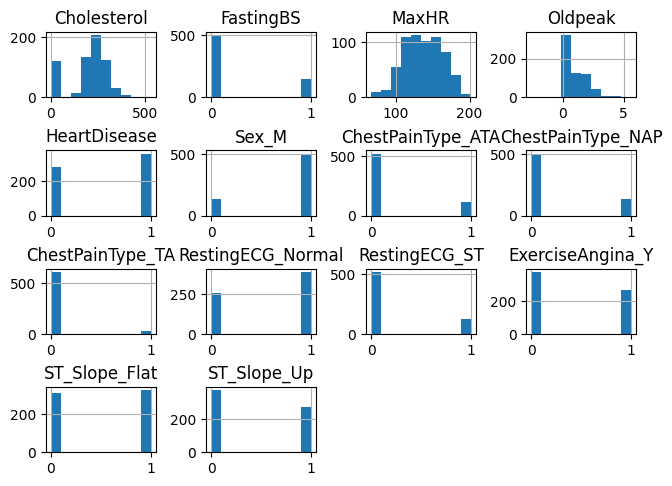

In [ ]:
data_train_oh.iloc[:,2:].hist()
plt.tight_layout( pad = 0.5)

Separating X values for data_train

In [ ]:
data_trainX = data_train_oh.loc[:,data_train_oh.columns != 'HeartDisease']
data_trainX

Separating Y values for data_test

In [ ]:
data_trainY = data_train["HeartDisease"]

## Normalizing Data (Need to standarize data first)

In [ ]:
scaler = sklearn.preprocessing.StandardScaler().set_output(transform="pandas")

data_trainX_scl = scaler.fit_transform(data_trainX)
data_trainX_scl.hist()
plt.tight_layout(pad = 0.5)

Feature Select

In [63]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False))\
.set_output(transform="pandas")

X_new = model.fit_transform(data_trainX_scl, data_trainY)
set(X_new.columns.tolist())

Index(['Age', 'Cholesterol', 'FastingBS', 'Oldpeak', 'Sex_M',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [76]:
set(data_trainX_scl.columns.tolist()) - set(X_new.columns.tolist())

{'ChestPainType_TA',
 'MaxHR',
 'RestingBP',
 'RestingECG_Normal',
 'RestingECG_ST'}

# Pipeline

## Splitting the test data into training, validation and test
[Source](https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn)

In [69]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X_new, data_trainY, test_size=0.25)

## Model

In [57]:
data_trainY.value_counts()

1    359
0    284
Name: HeartDisease, dtype: int64

### Random forest

In [70]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

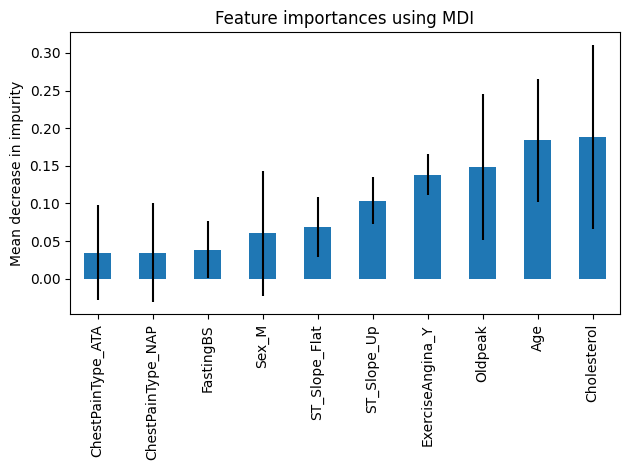

In [66]:


importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

# Plotting
feature_names = x_train.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values()
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#ax.xtikcks(feature_names)
fig.tight_layout()

#### Tree Validation

In [71]:
# On test data
y_pred = clf.predict(x_test)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Ballanced accuracy on test data:", balanced_accuracy_score(y_test, y_pred))


# On train data
y_pred = clf.predict(x_train)
print("Confusion matrix:")
print(confusion_matrix(y_train, y_pred))
print("Accuracy on training data:", accuracy_score(y_train, y_pred))
print("Ballanced accuracy on train data:", balanced_accuracy_score(y_train, y_pred))

# On val data
y_pred = clf.predict(x_val)
print("Confusion matrix:")
print(confusion_matrix(y_val, y_pred))
print("Accuracy on val data:", accuracy_score(y_val, y_pred))
print("Ballanced accuracy on val data:", balanced_accuracy_score(y_val, y_pred))

Confusion matrix:
[[56 15]
 [10 80]]
Accuracy on test data: 0.84472049689441
Ballanced accuracy on test data: 0.8388106416275429
Confusion matrix:
[[212   1]
 [  0 269]]
Accuracy on training data: 0.9979253112033195
Ballanced accuracy on train data: 0.9976525821596245
Confusion matrix:
[[42  3]
 [ 3 48]]
Accuracy on val data: 0.9375
Ballanced accuracy on val data: 0.9372549019607843


### Logistic regression

<Axes: ylabel='Feature'>

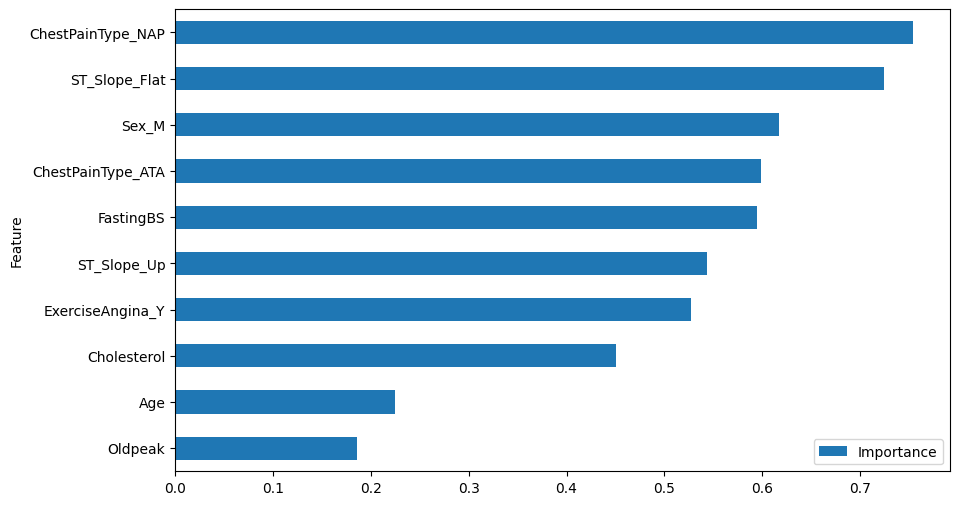

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)


coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_new.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
#accuracy_score(y_test, y_pred)

## Data Summary


In [ ]:
n_num_col = train.select_dtypes(exclude= "number").columns
n_num_col

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

## Satistics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y = train_hot["HeartDisease"]
X = train_hot.iloc[:,2:-2].select_dtypes("number").drop(["Oldpeak"], axis = 1)
X_scale = scaler.fit_transform(train_hot)



NameError: name 'train_hot' is not defined

## Training

## Validation

## Creating data for submission

### Loading test data

In [ ]:
data_test = pd.read_csv("/content/heart/heart_test.csv")

### Cleaning test data

### Scaling test data

In [ ]:
scaler = sklearn.preprocessing.StandardScaler().fit(data_test)
data_trainX = scaler.transform(data_test)

### Generating predictions

### Saving predictions to CSV